In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/movies.csv')
df = df.dropna(subset=['genre'])
df.head()
df.shape

(3722, 20)

# Check doc embeddings

### Add embeddings to df

In [3]:
from pathlib import Path
import numpy as np

def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >= 2:
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [4]:
mean_filenames, embeddings_mean = read_embeddings('../dataset/embeddings_mean.txt')
max_filenames, embeddings_max = read_embeddings('../dataset/embeddings_max.txt')
min_filenames, embeddings_min = read_embeddings('../dataset/embeddings_min.txt')

bert_mean_filenames, bert_mean = read_embeddings('../dataset/embeddings_bert_mean.txt')
bert_max_filenames, bert_max = read_embeddings('../dataset/embeddings_bert_max.txt')
bert_min_filenames, bert_min = read_embeddings('../dataset/embeddings_bert_min.txt')

bert_headtail_filenames, bert_headtail = read_embeddings('../dataset/embeddings_min.txt')

In [5]:
bert_headtail[bert_headtail.shape == (0,)] = np.zeros((300,))

In [6]:
df = df[df['filename'].isin(mean_filenames)].copy()

In [7]:
mean_embeddings = []
max_embeddings = []
min_embeddings = []

mean_bert = []
max_bert = []
min_bert = []
ht_bert = []
for index, row in df.iterrows():
    mean_embeddings.append(embeddings_mean[np.where(mean_filenames == row.filename)].ravel())
    max_embeddings.append(embeddings_max[np.where(max_filenames == row.filename)].ravel())
    min_embeddings.append(embeddings_min[np.where(min_filenames == row.filename)].ravel())
    
    mean_bert.append((bert_mean[np.where(bert_mean_filenames == row.filename)].ravel()))
    max_bert.append((bert_max[np.where(bert_max_filenames == row.filename)].ravel()))
    min_bert.append((bert_min[np.where(bert_min_filenames == row.filename)].ravel()))
    
    ht_bert.append((bert_headtail[np.where(bert_headtail_filenames == row.filename)].ravel()))
    
df['fasttext_mean'] = mean_embeddings
df['fasttext_max'] = max_embeddings
df['fasttext_min'] = min_embeddings

df['bert_mean'] = mean_bert
df['bert_max'] = max_bert
df['bert_min'] = min_bert


mean_embeddings = np.asarray(mean_embeddings)
max_embeddings = np.asarray(max_embeddings)
min_embeddings = np.asarray(min_embeddings)

mean_bert = np.asarray(mean_bert)
max_bert = np.asarray(max_bert)
min_bert = np.asarray(min_bert)

ht_bert = np.asarray(ht_bert)

del embeddings_mean, embeddings_max, embeddings_min, bert_mean, bert_max, bert_min, bert_headtail

In [8]:
set(map(lambda x: x.shape, ht_bert))

{(300,)}

# Check distances matrices of embedding types

In [9]:
from scipy.spatial import distance_matrix

In [10]:
dm_mean = distance_matrix(mean_embeddings, mean_embeddings)
dm_mean.min(), dm_mean.max(), dm_mean.mean(), dm_mean.std()

(0.0, 3.064995558726996, 0.2948696870968105, 0.15804729698376518)

In [11]:
dm_max = distance_matrix(max_embeddings, max_embeddings)
dm_max.min(), dm_max.max(), dm_max.mean(), dm_max.std()

(0.0, 10.650330055974557, 2.883168232911876, 0.6971567983308155)

In [12]:
dm_min = distance_matrix(min_embeddings, min_embeddings)
dm_min.min(), dm_min.max(), dm_min.mean(), dm_min.std()

(0.0, 10.348729224816736, 2.790476264442408, 0.6859636744322651)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

tfidf = TfidfVectorizer(max_features=5000, stop_words=get_stop_words('de'))

X_tfidf = tfidf.fit_transform(df.text)

# Dimensionality reduction with PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

Xr_tfidf = pca.fit_transform(X_tfidf.todense())

In [16]:
pca = PCA(n_components=2)

Xr_mean = pca.fit_transform(mean_embeddings)

In [17]:
pca = PCA(n_components=2)

Xr_max = pca.fit_transform(max_embeddings)

In [18]:
pca = PCA(n_components=2)

Xr_min = pca.fit_transform(min_embeddings)

In [19]:
pca = PCA(n_components=2)

Xr_bmean = pca.fit_transform(mean_bert)

In [20]:
pca = PCA(n_components=2)

Xr_bmax = pca.fit_transform(max_bert)

In [21]:
pca = PCA(n_components=2)

Xr_bmin = pca.fit_transform(min_bert)

In [22]:
pca = PCA(n_components=2)

Xr_bht = pca.fit_transform(ht_bert)

In [23]:
import seaborn as sns

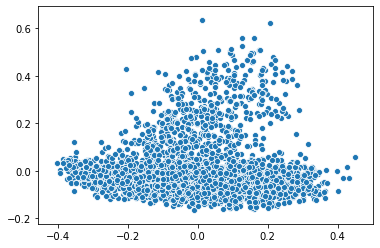

In [24]:
sns.scatterplot(x=Xr_tfidf[:,0], y=Xr_tfidf[:,1])

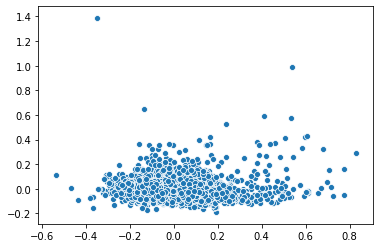

In [25]:
sns.scatterplot(x=Xr_mean[:,0], y=Xr_mean[:,1])

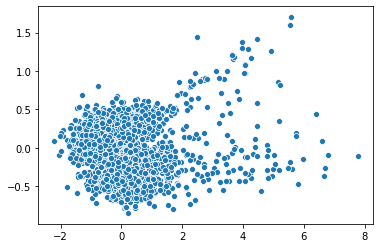

In [26]:
sns.scatterplot(x=Xr_max[:,0], y=Xr_max[:,1])

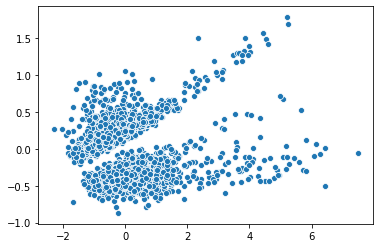

In [27]:
sns.scatterplot(x=Xr_min[:,0], y=Xr_min[:,1])

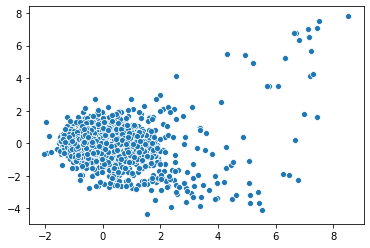

In [28]:
sns.scatterplot(x=Xr_bmean[:,0], y=Xr_bmean[:,1])

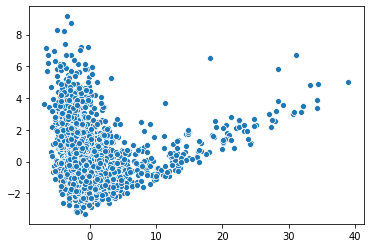

In [29]:
sns.scatterplot(x=Xr_bmax[:,0], y=Xr_bmax[:,1])

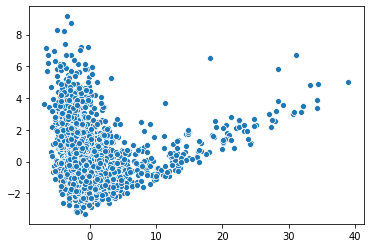

In [30]:
sns.scatterplot(x=Xr_bmin[:,0], y=Xr_bmin[:,1])

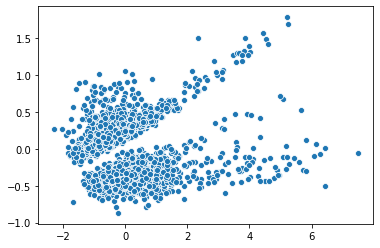

In [31]:
sns.scatterplot(x=Xr_bht[:,0], y=Xr_bht[:,1])

# Dimensionality reduction with UMAP

In [32]:
from umap import UMAP

In [33]:
umap = UMAP(n_components=2)

Xru_tfidf = umap.fit_transform(X_tfidf)

In [34]:
umap = UMAP(n_components=2)

Xru_mean = umap.fit_transform(mean_embeddings)

In [35]:
umap = UMAP(n_components=2)

Xru_max = umap.fit_transform(max_embeddings)

In [36]:
umap = UMAP(n_components=2)

Xru_min = umap.fit_transform(min_embeddings)

In [37]:
umap = UMAP(n_components=2)

Xru_bmean = umap.fit_transform(mean_bert)

In [38]:
umap = UMAP(n_components=2)

Xru_bmax = umap.fit_transform(max_bert)

In [39]:
umap = UMAP(n_components=2)

Xru_bmin = umap.fit_transform(min_bert)

In [40]:
umap = UMAP(n_components=2)

Xru_bht = umap.fit_transform(ht_bert)

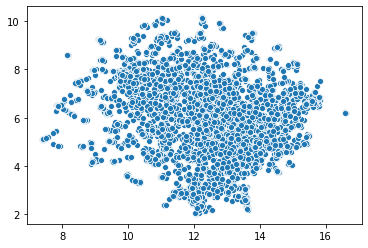

In [41]:
sns.scatterplot(x=Xru_tfidf[:,0], y=Xru_tfidf[:,1])

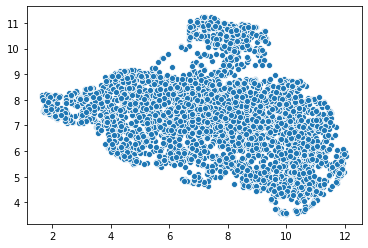

In [42]:
sns.scatterplot(x=Xru_mean[:,0], y=Xru_mean[:,1])

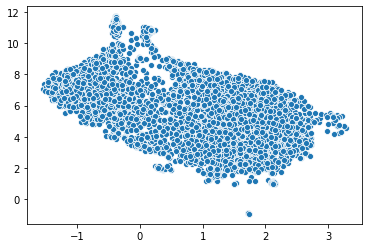

In [43]:
sns.scatterplot(x=Xru_max[:,0], y=Xru_max[:,1])

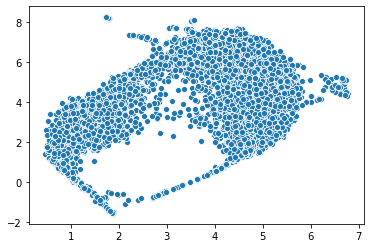

In [44]:
sns.scatterplot(x=Xru_min[:,0], y=Xru_min[:,1])

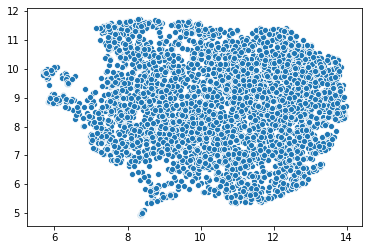

In [45]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=2, strategy='kmeans')

binned_values = discretizer.fit_transform(df.runtimeMinutes.fillna(-1000).to_numpy().reshape(-1, 1))
bins = [f'Bin {i}' for i in np.nonzero(binned_values)[1]]
sns.hls_palette(8, l=.3, s=.8)
sns.scatterplot(x=Xru_bmean[:,0], y=Xru_bmean[:,1])#, hue=trans)

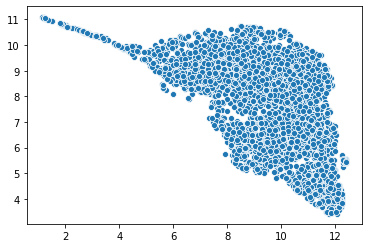

In [46]:
sns.scatterplot(x=Xru_bmax[:,0], y=Xru_bmax[:,1])

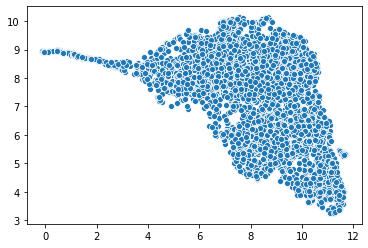

In [47]:
sns.scatterplot(x=Xru_bmin[:,0], y=Xru_bmin[:,1])

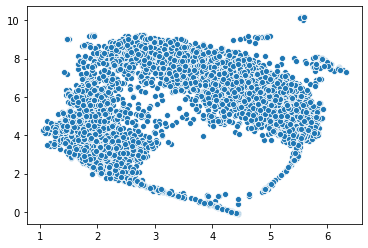

In [48]:
sns.scatterplot(x=Xru_bht[:,0], y=Xru_bht[:,1])

# Dimensionality reduction with TSNE

In [49]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_tidf = tsne.fit_transform(X_tfidf)

In [51]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_mean = tsne.fit_transform(mean_embeddings)

In [52]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_max = tsne.fit_transform(max_embeddings)

In [53]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_min = tsne.fit_transform(min_embeddings)

In [54]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bmean = tsne.fit_transform(mean_bert)

In [55]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bmax = tsne.fit_transform(max_bert)

In [56]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bmin = tsne.fit_transform(min_bert)

In [57]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bht = tsne.fit_transform(ht_bert)

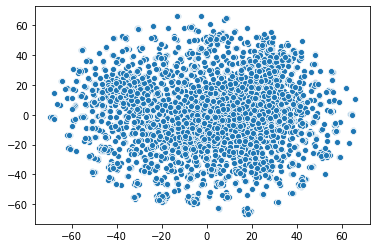

In [58]:
sns.scatterplot(x=Xrt_tidf[:,0], y=Xrt_tidf[:,1])

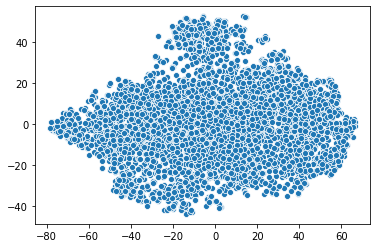

In [59]:
sns.scatterplot(x=Xrt_mean[:,0], y=Xrt_mean[:,1])

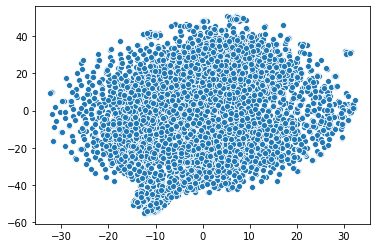

In [60]:
sns.scatterplot(x=Xrt_max[:,0], y=Xrt_max[:,1])

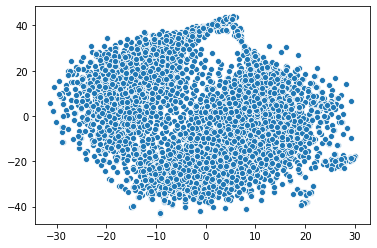

In [61]:
sns.scatterplot(x=Xrt_min[:,0], y=Xrt_min[:,1])

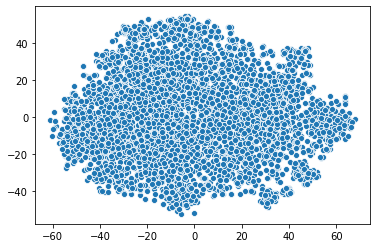

In [62]:
sns.scatterplot(x=Xrt_bmean[:,0], y=Xrt_bmean[:,1])

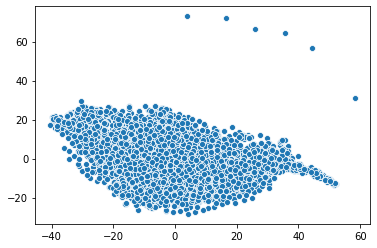

In [63]:
sns.scatterplot(x=Xrt_bmax[:,0], y=Xrt_bmax[:,1])

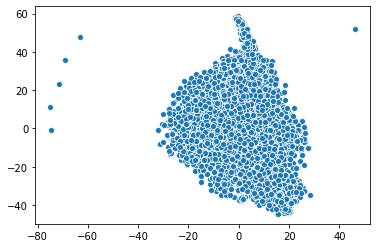

In [64]:
sns.scatterplot(x=Xrt_bmin[:,0], y=Xrt_bmin[:,1])

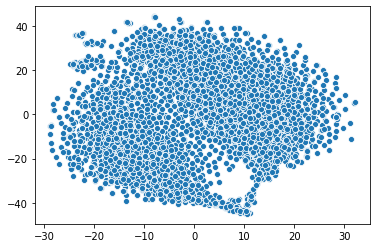

In [65]:
sns.scatterplot(x=Xrt_bht[:,0], y=Xrt_bht[:,1])

# Some clusterings tests

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lennartkelle

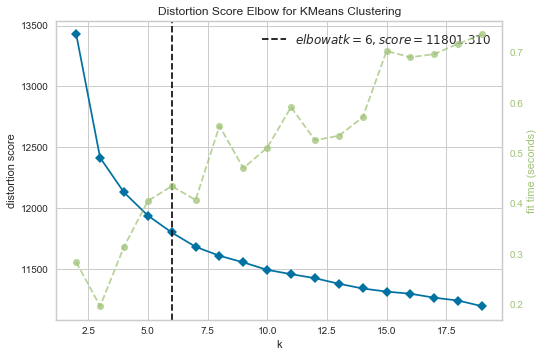

In [66]:
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_jobs=-1)

visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(ht_bert)
visualizer.show()

In [67]:
# => Number of cluster: 3 (??!?!?!?!?!?!)
N_CLUSTER = 3

In [248]:
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.mixture import GaussianMixture
clu = KMeans(n_clusters=N_CLUSTER, n_jobs=-1)
clu = DBSCAN(n_jobs=-1, metric='cosine', **{'eps': 0.5, 'min_samples': 8})
#clu = OPTICS(n_clusters=N_CLUSTER)
#clu = GaussianMixture(n_components=N_CLUSTER)
#clu = DBSCAN(n_jobs=-1)
#clu = Birch(n_clusters=6)
labels = clu.fit_predict(X_tfidf)

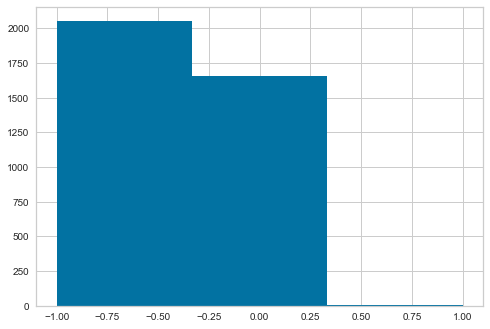

In [249]:
import matplotlib.pyplot as plt

plt.hist(labels, bins=N_CLUSTER)
plt.show()

In [250]:
import seaborn as sns

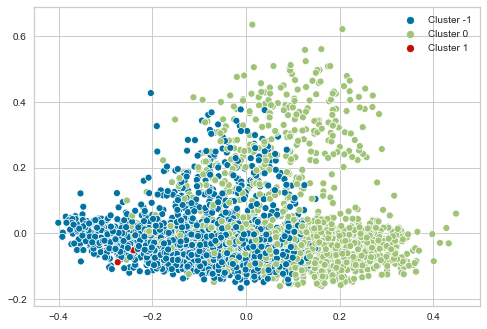

In [251]:
sns.scatterplot(x=Xr_tfidf[:,0], y=Xr_tfidf[:,1], hue=[f'Cluster {l}' for l in labels])

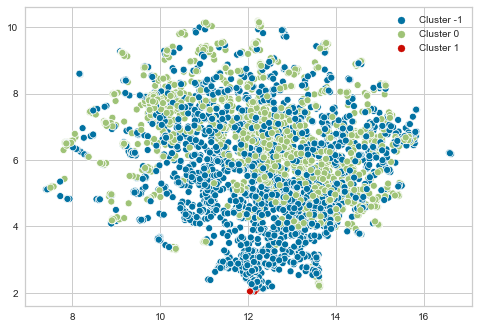

In [252]:
sns.scatterplot(x=Xru_tfidf[:,0], y=Xru_tfidf[:,1], hue=[f'Cluster {l}' for l in labels])

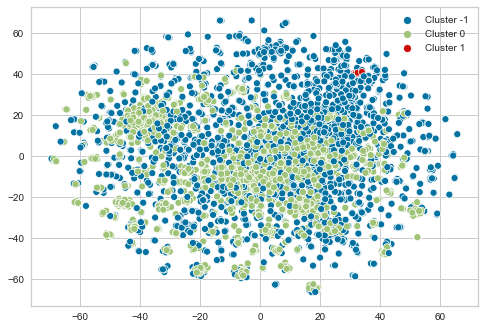

In [253]:
sns.scatterplot(x=Xrt_tidf[:,0], y=Xrt_tidf[:,1], hue=[f'Cluster {l}' for l in labels])

# Get 20 most frequent word for each cluster (excluding stopwords)

In [215]:
import re
from collections import Counter
from stop_words import get_stop_words

for label in set(labels):
    curr_df = df[labels==label]
    text = " ".join(curr_df.text.str.lower())
    tokens = [t for t in re.findall(r'\w+', text) if t not in get_stop_words('de')]
    freqs = Counter(tokens)
    print(f'Cluster {label}')
    print(f'{curr_df.shape[0]} Samples')
    print(*freqs.most_common(100), sep='\n')
    print("\n\n")
    

Cluster 0
498 Samples
('ja', 42298)
('nein', 24162)
('hast', 17241)
('gut', 16770)
('mal', 15342)
('s', 14665)
('schon', 14088)
('oh', 11178)
('geht', 9942)
('weiß', 9808)
('hey', 9195)
('los', 9087)
('ok', 9030)
('okay', 8667)
('danke', 8459)
('komm', 7998)
('mann', 7505)
('bitte', 7355)
('mehr', 6592)
('immer', 6483)
('tut', 6319)
('willst', 6090)
('klar', 5835)
('gott', 5789)
('na', 5709)
('wirklich', 5482)
('warum', 5423)
('leid', 5420)
('einfach', 5317)
('sagen', 5316)
('weißt', 5305)
('scheiße', 5295)
('wer', 5142)
('gehen', 5079)
('sehen', 5077)
('ganz', 5011)
('nie', 4950)
('hallo', 4896)
('vielleicht', 4637)
('tun', 4363)
('kommt', 4273)
('gibt', 4270)
('gesagt', 4232)
('mach', 4156)
('echt', 4130)
('heute', 4123)
('kannst', 4026)
('lass', 4003)
('hör', 3934)
('schön', 3923)
('leben', 3890)
('macht', 3812)
('liebe', 3702)
('zwei', 3592)
('müssen', 3556)
('zeit', 3470)
('wäre', 3425)
('genau', 3357)
('ab', 3343)
('ach', 3342)
('sicher', 3179)
('frau', 3172)
('leute', 3160)
('mu

Cluster 6
4 Samples
('ja', 168)
('hast', 147)
('nein', 135)
('bella', 121)
('schon', 111)
('gut', 104)
('s', 68)
('kannst', 68)
('sehen', 65)
('weiß', 65)
('bitte', 65)
('komm', 63)
('mal', 61)
('geht', 59)
('immer', 58)
('hey', 57)
('mack', 50)
('tut', 49)
('tun', 45)
('danke', 44)
('leid', 44)
('gott', 43)
('mehr', 42)
('dad', 41)
('los', 37)
('willst', 37)
('oh', 36)
('müssen', 36)
('weißt', 36)
('einfach', 36)
('jim', 36)
('warum', 35)
('jacob', 35)
('leben', 35)
('liebe', 34)
('wirklich', 34)
('nie', 34)
('okay', 34)
('vielleicht', 33)
('mach', 32)
('gehen', 32)
('musst', 32)
('na', 31)
('kommt', 31)
('edward', 30)
('ok', 30)
('klar', 30)
('ganz', 29)
('gesehen', 29)
('schön', 29)
('zeit', 29)
('jake', 29)
('lass', 28)
('wer', 28)
('sagen', 27)
('missy', 27)
('wieso', 26)
('gibt', 26)
('hör', 26)
('william', 26)
('wäre', 25)
('geh', 25)
('gesagt', 24)
('gar', 23)
('sieh', 23)
('raus', 22)
('sicher', 22)
('zurück', 22)
('gerade', 22)
('familie', 21)
('richtig', 21)
('vater', 21)
('

Cluster 14
3 Samples
('ja', 110)
('nein', 106)
('soren', 101)
('hast', 100)
('s', 84)
('oh', 81)
('schon', 79)
('peter', 75)
('mal', 63)
('los', 61)
('stöhnt', 57)
('komm', 55)
('schreit', 55)
('kludd', 54)
('gut', 52)
('geht', 51)
('hey', 50)
('hook', 43)
('lacht', 42)
('müssen', 42)
('weißt', 40)
('gibt', 40)
('kommt', 40)
('schreien', 40)
('könig', 39)
('schwert', 39)
('immer', 38)
('ächzt', 37)
('mann', 37)
('smee', 37)
('kannst', 36)
('weiß', 33)
('gylfie', 33)
('keucht', 33)
('vortigern', 33)
('eule', 32)
('ächzen', 32)
('wer', 32)
('äh', 31)
('na', 30)
('mehr', 30)
('bitte', 29)
('ha', 28)
('ganz', 28)
('junge', 28)
('blackbeard', 28)
('eulen', 27)
('sehen', 27)
('jatt', 27)
('2', 27)
('digger', 27)
('arthur', 27)
('macht', 26)
('wissen', 26)
('gesagt', 25)
('fliegen', 25)
('kreischt', 25)
('jutt', 25)
('habt', 25)
('schnell', 25)
('mutter', 25)
('heute', 24)
('warum', 24)
('finden', 24)
('nie', 24)
('eisenschnabel', 23)
('sohn', 23)
('zeit', 23)
('beide', 23)
('seid', 23)
('wäc

KeyboardInterrupt: 

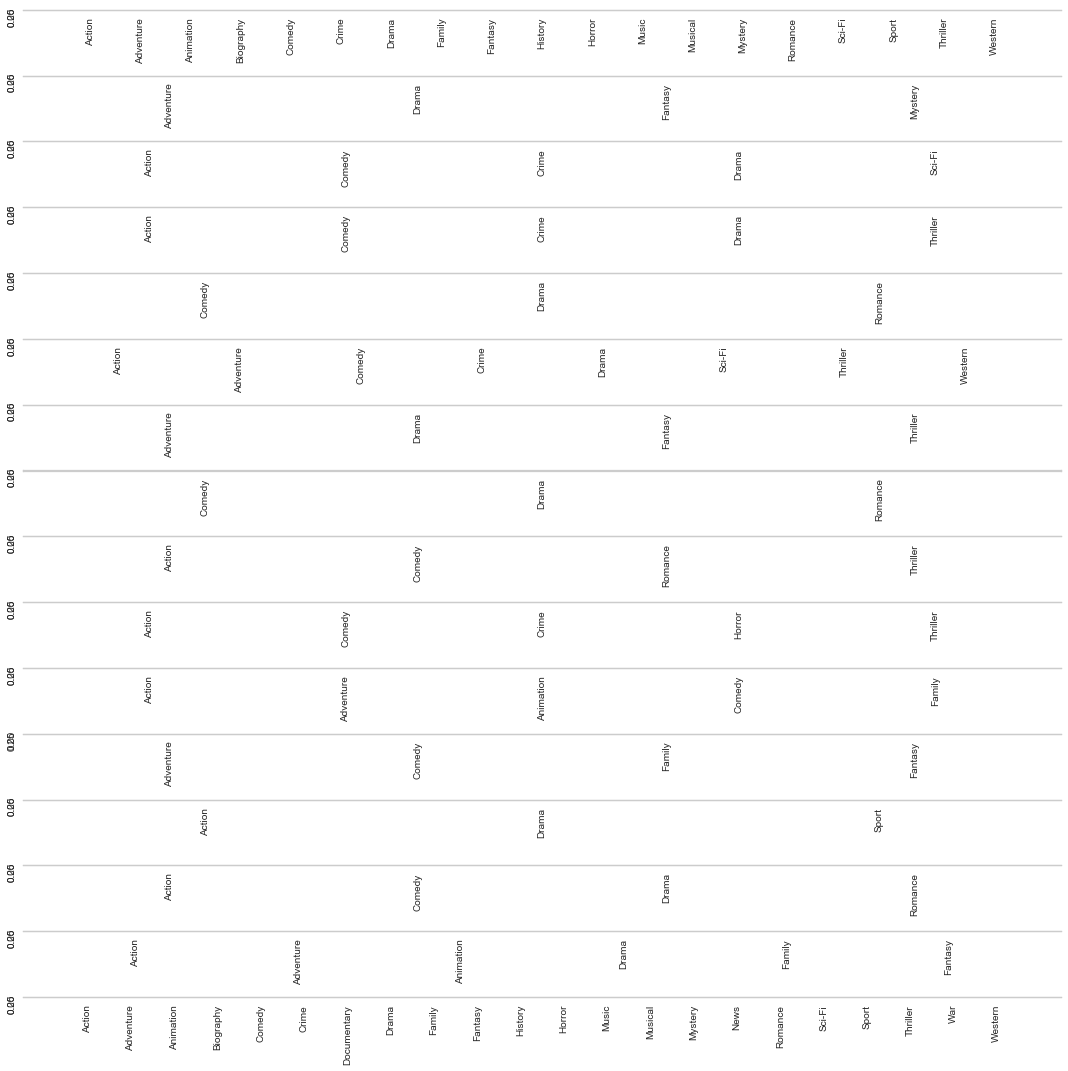

In [147]:
import matplotlib.pyplot as plt
from collections import Counter

unique_genres = set([genre for entry in df.genre.dropna() for genre in entry.split(',')])

fig, axs = plt.subplots(len(set(labels)), figsize=(15,15))
plt.xticks(rotation='vertical')


for index, label in enumerate(set(labels)):
    curr_df = df[labels==label]
    genre_freqs = Counter([genre for entry in curr_df.genre.dropna() for genre in entry.split(',')])
    genre_freqs = dict(sorted(zip(genre_freqs.keys(), genre_freqs.values()), key=lambda x: x[0]))
    relative_freqs = [entry/sum(genre_freqs.values()) for entry in genre_freqs.values()]
    axs[index].bar(list(genre_freqs.keys()), relative_freqs)
    axs[index].tick_params(labelrotation=90)
    axs[index].set_ylim([0, 0.35])

plt.tight_layout()
plt.show()

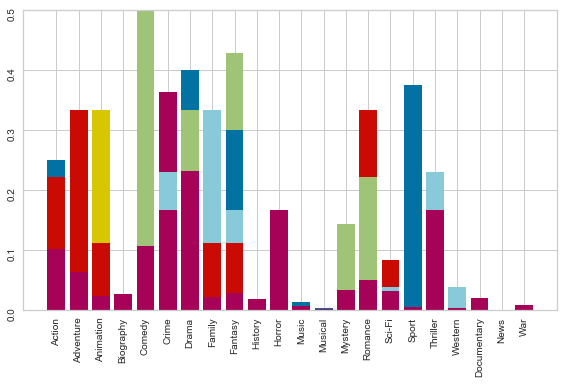

In [148]:
import matplotlib.pyplot as plt


unique_genres = set([genre for entry in df.genre.dropna() for genre in entry.split(',')])

ax = plt.subplot()


for index, label in enumerate(set(labels)):
    curr_df = df[labels==label]
    genre_freqs = Counter([genre for entry in curr_df.genre.dropna() for genre in entry.split(',')])
    genre_freqs = dict(sorted(zip(genre_freqs.keys(), genre_freqs.values()), key=lambda x: x[0]))
    relative_freqs = [entry/sum(genre_freqs.values()) for entry in genre_freqs.values()]
    ax.bar(list(genre_freqs.keys()), relative_freqs)
    ax.tick_params(labelrotation=90)
    ax.set_ylim([0, 0.5])

plt.tight_layout()
plt.show()

In [219]:
from collections import Counter
import pandas as pd


unique_genres = set([genre for entry in df.genre.dropna() for genre in entry.split(',')])


data = []
for index, label in enumerate(set(labels)):
    curr_df = df[labels==label]
    genre_freqs = Counter([genre for entry in curr_df.genre.dropna() for genre in entry.split(',')])
    genre_freqs = dict(sorted(zip(genre_freqs.keys(), genre_freqs.values()), key=lambda x: x[0]))
    relative_freqs = {genre: entry/sum(genre_freqs.values()) for genre, entry in genre_freqs.items()}
    relative_freqs['Cluster'] = f'Cluster{index}'
    data.append(relative_freqs)

clu_df = pd.DataFrame.from_dict(data).fillna(0).set_index('Cluster')

In [220]:
clu_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western,Documentary,News,War
Cluster,,,,,,,,,,,,,,,,,,,,,
Cluster0,0.065589,0.033270,0.008555,0.006654,0.295627,0.063688,0.224335,0.021863,0.009506,0.002852,...,0.003802,0.010456,0.134981,0.022814,0.003802,0.047529,0.000951,0.000000,0.000000,0.000000
Cluster1,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster2,0.250000,0.000000,0.000000,0.000000,0.083333,0.333333,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster3,0.181818,0.000000,0.000000,0.000000,0.090909,0.363636,0.272727,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000
Cluster4,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.222222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster5,0.230769,0.038462,0.000000,0.000000,0.076923,0.230769,0.115385,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.038462,0.000000,0.230769,0.038462,0.000000,0.000000,0.000000
Cluster6,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
Cluster7,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster8,0.166667,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000


In [151]:
clu_df.max(axis=1)

Cluster
Cluster0     0.295627
Cluster1     0.428571
Cluster2     0.333333
Cluster3     0.363636
Cluster4     0.444444
Cluster5     0.230769
Cluster6     0.400000
Cluster7     0.571429
Cluster8     0.333333
Cluster9     0.333333
Cluster10    0.333333
Cluster11    0.333333
Cluster12    0.375000
Cluster13    0.333333
Cluster14    0.333333
Cluster15    0.231253
dtype: float64

In [152]:
clu_df['Cluster'] = clu_df.index.to_series()
plot_df = pd.melt(clu_df, id_vars="Cluster", var_name="Genre", value_name="Rel. Freq.")
plot_df

,Cluster,Genre,Rel. Freq.
0,Cluster0,Action,0.065589
1,Cluster1,Action,0.000000
2,Cluster2,Action,0.250000
3,Cluster3,Action,0.181818
4,Cluster4,Action,0.000000
...,...,...,...
347,Cluster11,War,0.000000
348,Cluster12,War,0.000000
349,Cluster13,War,0.000000
350,Cluster14,War,0.000000


/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 3600x1800 with 0 Axes>

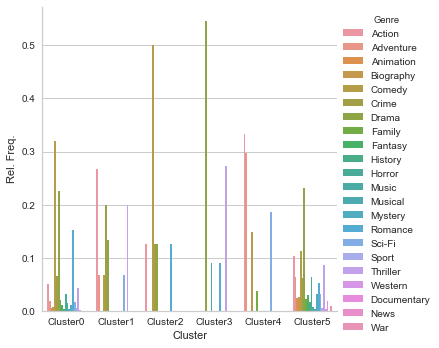

In [81]:
plt.figure(figsize=(50, 25))
sns.factorplot(x='Cluster', y='Rel. Freq.', hue='Genre', data=plot_df, kind='bar')

# Genre shit

In [82]:
from collections import Counter
genre_freqs = Counter([genre for entry in df.genre.dropna() for genre in entry.split(',')])

In [83]:
genre_freqs.most_common()

[('Drama', 1879),
 ('Comedy', 1087),
 ('Action', 806),
 ('Thriller', 676),
 ('Crime', 508),
 ('Romance', 504),
 ('Horror', 498),
 ('Adventure', 488),
 ('Sci-Fi', 254),
 ('Mystery', 244),
 ('Fantasy', 221),
 ('Biography', 194),
 ('Family', 177),
 ('Animation', 175),
 ('Documentary', 136),
 ('History', 127),
 ('War', 64),
 ('Music', 62),
 ('Sport', 38),
 ('Western', 30),
 ('Musical', 21),
 ('News', 2)]

In [84]:
y = []
for entry in df.genre:
    genres = entry.split(',')
    if 'Drama' in genres and 'Comedy' not in genres:
        y.append('Drama')
    elif 'Drama' not in genres and 'Comedy' in genres:
        y.append('Comedy')
    else:
        y.append('Mixed')

In [85]:
data = [(mean_bert, y), (max_bert, y), (min_bert, y), (X_tfidf, y)]

In [86]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.base import clone as clone_estimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook

classifier = LinearSVC()

for X, y in tqdm_notebook(data):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    clf = clone_estimator(classifier)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))

<ipython-input-86-3aae28c23868>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for X, y in tqdm_notebook(data):


/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.68      0.44      0.53       174
       Drama       0.56      0.82      0.66       368
       Mixed       0.62      0.44      0.52       388

    accuracy                           0.59       930
   macro avg       0.62      0.57      0.57       930
weighted avg       0.61      0.59      0.58       930



/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.32      0.24      0.27       174
       Drama       0.58      0.27      0.37       368
       Mixed       0.46      0.74      0.57       388

    accuracy                           0.46       930
   macro avg       0.45      0.42      0.40       930
weighted avg       0.48      0.46      0.43       930



/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.34      0.24      0.28       174
       Drama       0.50      0.61      0.55       368
       Mixed       0.49      0.46      0.48       388

    accuracy                           0.48       930
   macro avg       0.45      0.44      0.44       930
weighted avg       0.47      0.48      0.47       930

              precision    recall  f1-score   support

      Comedy       0.64      0.50      0.56       174
       Drama       0.61      0.67      0.64       368
       Mixed       0.55      0.55      0.55       388

    accuracy                           0.59       930
   macro avg       0.60      0.58      0.59       930
weighted avg       0.59      0.59      0.59       930




In [87]:
df[labels==2]

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,endYear,runtimeMinutes,averageRating,numVotes,fasttext_mean,fasttext_max,fasttext_min,bert_mean,bert_max,bert_min
1196,35349,5594984.xml,"Ich war immer überzeugt , dass ich mich irgend...",tt1669694,"Action,Comedy,Crime",2011.0,French,untokenisiert,88.0,nm2056306,...,NaN,88.0,5.7,527.0,"[-0.06849818, 0.13438015, -0.14359824, -0.2292...","[0.57557, 1.1098, 0.74069, 0.62292, 1.0311, 1....","[-0.90807, -0.60063, -1.0368, -1.0677, -0.5022...","[0.03153143, 0.4283942, 0.14000604, -0.1168491...","[-1.459139, -1.3552563, -1.2207671, -1.6550173...","[-1.459139, -1.3552563, -1.2207671, -1.6550173..."
1327,36307,6004119.xml,"Ich weinte bei meiner Geburt , und jeder Tag z...",tt1841705,Comedy,2011.0,French,untokenisiert,NaN,nm0948248,...,NaN,NaN,6.2,114.0,"[-0.068562515, 0.12208753, -0.1497204, -0.2214...","[0.57557, 1.2107, 0.74069, 0.62348, 1.01, 1.03...","[-0.98232, -0.67739, -0.97026, -1.1077, -0.586...","[0.057626005, 0.42247808, 0.13699533, -0.13043...","[-0.9588602, -0.78188914, -1.2961601, -1.79361...","[-0.9588602, -0.78188914, -1.2961601, -1.79361..."
2155,42410,5848331.xml,Das Wasser ist zu niedrig . Da beißt nichts ! ...,tt2190760,Comedy,2013.0,Spanish,untokenisiert,86.0,nm2569676,...,NaN,86.0,5.5,346.0,"[-0.07145365, 0.14559387, -0.14605658, -0.2531...","[0.57557, 1.0938, 0.45954, 0.64805, 0.87685, 1...","[-0.88971, -0.52082, -1.0407, -1.0776, -0.6362...","[0.04590466, 0.4349698, 0.17289613, -0.1348908...","[-0.9519963, -0.97106254, -1.2809781, -2.17925...","[-0.9519963, -0.97106254, -1.2809781, -2.17925..."
2864,48366,6294224.xml,Fünf ! Vier ! Drei ! Zwei ! Eins ! Null ! Die ...,tt3399024,"Comedy,Drama,Romance",2014.0,French,untokenisiert,118.0,"nm0865918,nm0619923",...,NaN,118.0,6.7,14302.0,"[-0.07552282, 0.12665722, -0.13230838, -0.2226...","[0.71723, 1.1468, 0.68649, 0.62057, 1.2057, 1....","[-1.0886, -0.53268, -1.0838, -1.2674, -0.60162...","[0.052256126, 0.453029, 0.14076507, -0.0872942...","[-1.0119293, -0.86987305, -1.2207671, -1.95122...","[-1.0119293, -0.86987305, -1.2207671, -1.95122..."


In [88]:
label_powersets = {}
trans_genre_labels = []

for index, genre_comb in enumerate(df.genre):
    if not label_powersets.get(genre_comb):
        label_powersets[genre_comb] = index
    trans_genre_labels.append(label_powersets[genre_comb])
len(label_powersets)

358

In [89]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = df.genre.str.split(',')

mlb  = MultiLabelBinarizer()

y = mlb.fit_transform(labels)
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western'], dtype=object)

In [90]:
N_TOP = 7
top_genres = mlb.classes_[np.count_nonzero(y, axis=0).argsort()[-N_TOP:][::-1]][::-1]
top_genres

array(['Horror', 'Romance', 'Crime', 'Thriller', 'Action', 'Comedy',
       'Drama'], dtype=object)

In [91]:
trans = []
for l in labels:
    label = ""
    for genre in top_genres:
        if genre in l:
            label = genre
    if not label:
        label = "Unknown"
    trans.append(label)

In [92]:
trans.count("Unknown")

251

In [93]:
Counter(trans)

Counter({'Drama': 1879,
         'Comedy': 699,
         'Action': 441,
         'Romance': 15,
         'Unknown': 251,
         'Horror': 135,
         'Thriller': 275,
         'Crime': 24})

In [94]:
df.shape[0] - df[df.production_region.isna()].shape[0], df.production_region.unique().shape

(3160, (506,))

In [95]:
from collections import Counter

Counter(df.production_region).most_common(30)

[('English', 1397),
 (nan, 559),
 ('French', 210),
 ('German', 180),
 ('Japanese', 119),
 ('Spanish', 68),
 ('Korean', 50),
 ('English, Spanish', 40),
 ('Turkish', 35),
 ('Mandarin', 32),
 ('English, French', 32),
 ('French, English', 31),
 ('Norwegian', 29),
 ('Dutch', 25),
 ('Danish', 22),
 ('Swedish', 21),
 ('German, English', 21),
 ('Italian', 19),
 ('Cantonese', 16),
 ('Thai', 16),
 ('Russian', 16),
 ('Icelandic', 15),
 ('English, German', 15),
 ('Hindi', 13),
 ('English, Japanese', 13),
 ('English, Russian', 12),
 ('English, Italian', 9),
 ('Portuguese', 9),
 ('Japanese, English', 9),
 ('German, Turkish', 8)]

In [96]:
emb = mean_bert[(df.production_region == "English") | (df.production_region == "French")]
eng_french =  df[(df.production_region == "English") | (df.production_region == "French")]
emb.shape, eng_french.shape

((1607, 768), (1607, 26))

In [97]:
from umap import UMAP

umap = UMAP(n_components=2)

r = umap.fit_transform(emb)

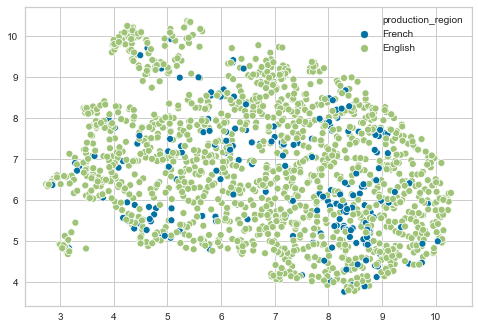

In [98]:
sns.scatterplot(x=r[:,0], y=r[:,1], hue=eng_french.production_region)

In [99]:
en = df[(df.production_region == "English")]
emb_en = X_tfidf.toarray()[(df.production_region == "English")]

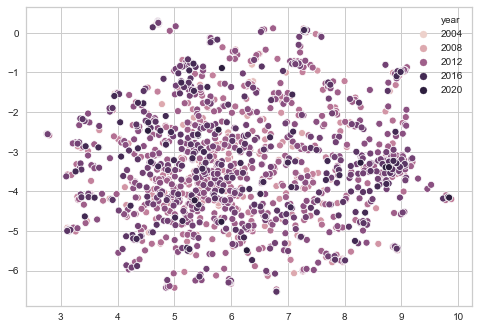

In [100]:
from umap import UMAP

umap = UMAP(n_components=2)

r = umap.fit_transform(emb_en)
sns.scatterplot(x=r[:,0], y=r[:,1], hue=en.year)

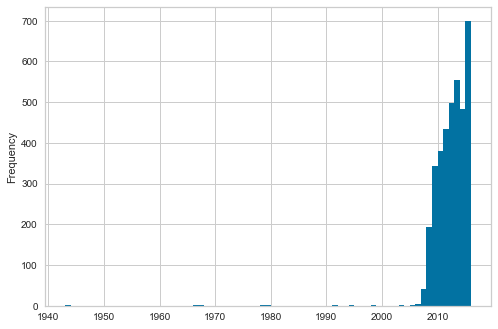

In [101]:
df.year.plot(kind='hist', bins=range(int(df.year.min()), int(df.year.max())))

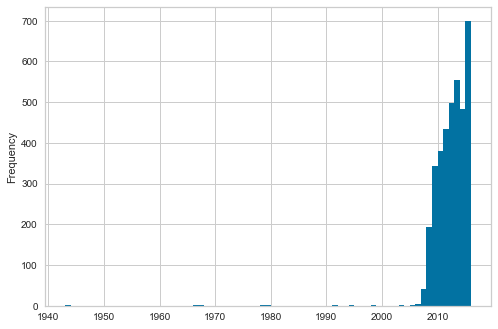

In [102]:
df.year.plot(kind='hist', bins=range(int(df.year.min()), int(df.year.max())))

In [103]:
Counter([i for i in df.genre if len(i.split(',')) > 1]).most_common(20)

[('Comedy,Drama', 144),
 ('Drama,Romance', 141),
 ('Comedy,Drama,Romance', 121),
 ('Comedy,Romance', 87),
 ('Horror,Thriller', 79),
 ('Drama,Thriller', 77),
 ('Action,Crime,Drama', 71),
 ('Crime,Drama,Thriller', 65),
 ('Adventure,Animation,Comedy', 65),
 ('Action,Crime,Thriller', 54),
 ('Action,Adventure,Sci-Fi', 46),
 ('Action,Comedy,Crime', 43),
 ('Action,Adventure,Drama', 41),
 ('Crime,Drama', 38),
 ('Biography,Drama', 35),
 ('Biography,Drama,History', 33),
 ('Crime,Drama,Mystery', 33),
 ('Action,Thriller', 31),
 ('Horror,Mystery,Thriller', 30),
 ('Action,Adventure,Fantasy', 30)]

In [257]:
from scipy.spatial.distance import pdist, cosine, squareform
dm = pdist(mean_embeddings, cosine)
dm = squareform(dm)

In [260]:
dm.mean()

0.016269708468936345

In [263]:
from sklearn.model_selection import ParameterGrid
from tqdm.notebook import tqdm
from collections import Counter

params = ParameterGrid({
    'eps': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
    'min_samples': list(range(2,11))
})

results = []
for param_comb in tqdm_notebook(params):
    clu = DBSCAN(n_jobs=-1, metric='cosine', **param_comb)
    labels = clu.fit_predict(min_bert)
    cluster_distribution = np.asarray(list(Counter(labels).values()))
    result = {
        'params': param_comb,
        'n_cluster': len(np.unique(labels)),
        'cluster_std': round(cluster_distribution.std(), 2),
        'cluster_mean': round(cluster_distribution.mean(), 2)
    }
    results.append(result)

print(*sorted(results, key=lambda x: x['n_cluster'], reverse=True), sep='\n')

<ipython-input-263-fd31331aeed7>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param_comb in tqdm_notebook(params):



{'params': {'eps': 0.01, 'min_samples': 2}, 'n_cluster': 10, 'cluster_std': 992.48, 'cluster_mean': 371.9}
{'params': {'eps': 0.005, 'min_samples': 2}, 'n_cluster': 4, 'cluster_std': 1606.91, 'cluster_mean': 929.75}
{'params': {'eps': 0.001, 'min_samples': 2}, 'n_cluster': 4, 'cluster_std': 1606.91, 'cluster_mean': 929.75}
{'params': {'eps': 0.05, 'min_samples': 2}, 'n_cluster': 3, 'cluster_std': 1715.79, 'cluster_mean': 1239.67}
{'params': {'eps': 0.01, 'min_samples': 3}, 'n_cluster': 3, 'cluster_std': 1496.26, 'cluster_mean': 1239.67}
{'params': {'eps': 0.01, 'min_samples': 4}, 'n_cluster': 3, 'cluster_std': 1506.21, 'cluster_mean': 1239.67}
{'params': {'eps': 0.01, 'min_samples': 5}, 'n_cluster': 3, 'cluster_std': 1514.35, 'cluster_mean': 1239.67}
{'params': {'eps': 0.1, 'min_samples': 2}, 'n_cluster': 2, 'cluster_std': 1848.5, 'cluster_mean': 1859.5}
{'params': {'eps': 0.1, 'min_samples': 3}, 'n_cluster': 2, 'cluster_std': 1848.5, 'cluster_mean': 1859.5}
{'params': {'eps': 0.1, 'm

In [264]:
for entry in results:
    if entry['cluster_std'] < entry['cluster_mean']:
        print(entry)

{'params': {'eps': 0.5, 'min_samples': 2}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 3}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 4}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 5}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 6}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 7}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 8}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 9}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 10}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.1, 'min_samples': 2}, 'n_cluster': 2, 'cluster_std'